In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn import metrics

In [5]:
data= sns.load_dataset('iris')

In [6]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
label_encoder=preprocessing.LabelEncoder()
data['species']=label_encoder.fit_transform(data['species'])

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
label_encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
label_encoder.inverse_transform([0,1,2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
x=data.iloc[:,0:4]
y=data['species']

In [13]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [16]:
data['species'].unique()

array([0, 1, 2])

In [17]:
data.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [18]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
col=list(data.columns)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [22]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=5)

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

[Text(236.72727272727275, 664.4, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]\nclass = virginica'),
 Text(169.0909090909091, 543.5999999999999, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(304.3636363636364, 543.5999999999999, 'petal length (cm) <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]\nclass = virginica'),
 Text(135.27272727272728, 422.79999999999995, 'petal width (cm) <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = versicolor'),
 Text(67.63636363636364, 301.99999999999994, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = versicolor'),
 Text(202.90909090909093, 301.99999999999994, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(473.4545454545455, 422.79999999999995, 'petal width (cm) <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]\nclass = virginica'),
 Text(338.1818181818182, 301.99999999999994, 'sepal width (cm) <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0

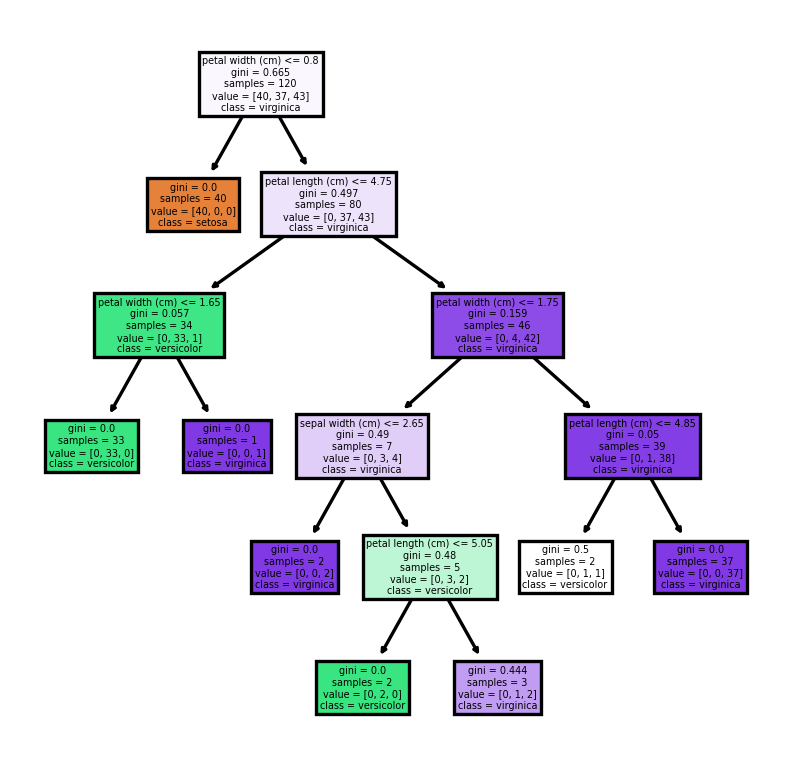

In [25]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

plt.subplots(figsize=(4,4),dpi=240)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [26]:
model.score(x_train,y_train)

0.9833333333333333

In [27]:
model.score(x_test,y_test)

0.9333333333333333

In [28]:
prd=model.predict(x_test)
pd.Series(prd).value_counts()

1    13
0    10
2     7
dtype: int64

In [29]:
from sklearn import metrics

In [30]:
metrics.accuracy_score(prd,y_test)

0.9333333333333333

In [31]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.92      0.92        13
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [32]:
model.feature_importances_

array([0.        , 0.01326904, 0.41984339, 0.56688757])